In [ ]:
## combine values into a vector: c()

c(1,2,3,4)+c(10,20,30,40)

c(1,2,3,4)*c(10,20,30,40)

c(1,2,3,4)-c(1,1,1,1)

c(1,2,3,4)+1

1/c(1,2,3,4)

c(1,2,3,4)+c(10,100)

c(1,2,3,4,5)+c(10,100)

"Hello world"

c("Hello world","Hello R")


## variables in R
x <- 1    # or 1 -> x or x = 1
y <- 2
z <- c(x,y)
z
z <- c(var1=x,var2=y)
z
#or
names(z) <- c("var1","var2")
z
#or
names(z)[c(1,2)] <- c("Var1","Var2")
z


## miscellaneous
1:9
1.5:10
c(1.5:10,10)
prod(1:8)
1:3 + 4:6
1:3 * 4:6

seq(1,5)
seq(1,5,by=0.5)
seq(1,5,length=7)

rep(10,10)
rep(c("A","B","C"),2)
matrix(rep(0,16),nrow=4)

a <- 1:20
a[5]
a[5:15]
a[-5]
a[-5:-15]

# logical
y <- rnorm(20)
y <- sort(c(0,y))
y
y[y>0]
y[y>0 & y<1]
y[y<0 | y>0]
y == 0

# first difference: diff()
x <- c(3.6, 3.7, 4.1, 4.6, 4.8, 5.0, 5.1, 5.4, 5.5, 5.9)
x
diff(x)



## matrices: array() and matrix()
w <- c(1,2,3,4,5,6,7,8,9,10,11,12)
w
array(w, dim=c(3,2,2))

a <- c(1,2,3,4,5,6,7,8,9,10)
A <- array(a, dim=c(5,2))
# otherwise
A <- matrix(a, nrow=5,ncol=2,byrow=FALSE)
A
A[1,2]
A[1,]
A[,1]
A[1:2,]
A[3:5,2]
A[c(1,3,5),]
B <- matrix(a, nrow=5,ncol=2,byrow=TRUE)
B
C <- matrix(a, nrow=2,ncol=5,byrow=TRUE, dimnames=list(c(1,2),c("A","B","C","D","E")))
C
t(C)
B%*%C
D <- C%*%B
D
det(D)
E <- solve(D)
E
D%*%E

## cbind() e rbind(): an alternative way to create matrices
A <- cbind(c(1,2),c(3,4),c(5,6),c(7,8),c(9,10))
A
A <- rbind(c(1,2),c(3,4),c(5,6),c(7,8),c(9,10))
A


# cut a continuous interval into sub-intervals
# (categorizes a continuous variable)
x <- c(12, 0.4, 5, 2, 50, 8, 3, 1, 4, 0.25)
xc <- cut(x,breaks=c(0,1,5,max(x)))
xc
table(xc)


## data frames
teams <- c("PHI","NYM","FLA","ATL","WSN")
w <- c(92,89,94,72,59)  # wins
d <- c(70,73,77,90,99)  # defeats
df <- data.frame(teams,w,d)
df
head(df,3)
tail(df,3)
edit(df)
df$w
df$teams=="FLA"
df$d[df$teams=="FLA"]
with(df,w)
with(df,teams=="FLA")
sub.df <- subset(df,w>80)
sub.df
# otherwise
nleast <- data.frame(teams=c("PHI","NYM","FLA","ATL","WSN"),
                     w = c(92,89,94,72,59),
                     d = c(70,73,77,90,99) )
nleast




# which() - find the index of elements of a vector or matrix that verifies some condition
y <- seq(1, 10, by=3)
y
which(y %% 2 == 0)         # "y %% 2" gives the reminder of the division of y by 2
# or
seq(along=y)[y %% 2 == 0]

x <- matrix(rnorm(10),nrow=5)
x
which(x > 0)
which(x > 0, arr.ind=FALSE)
which(x > 0, arr.ind=TRUE)


## by() and apply() with data frames
# fake data on wage, age and sex
set.seed(1234)
n <- 100
x <- data.frame(rnorm(n,mean=35,sd=10)^2, runif(n,min=18,max=66), rbinom(n,1,0.5))
names(x) <- c("wage","age","sex")
head(x)

# apply(X, MARGIN, FUN, ...)
apply(x,2,mean)
apply(x,2,median)
apply(x,2,sd)
apply(x,2,summary)
#sapply(x$Salario,function(x) x*1.2375)

# by(data, INDICES, FUN, ...)
by(x[,1:2],x[,3],summary)
by(x[,1:2],x$sex,summary)  # in alternative using "x$sex" instead of "x[,3]"
which(x[,1]>2500)          # who earns more than 2500Eur


# apply() with matrices
#m <- matrix(c(1:10,11:20),nrow=10,ncol=2)
m <- matrix(1:20,nrow=10)
apply(m,1,mean)                    # mean of rows
apply(m,2,mean)                    # mean of columns
apply(m,2,function(x) sum(x/2))    # using a general function: sum of x/2
apply(m,2,function(x) sum(sin(x))) # using a general function: sum of sin(x)

# or, for sums and means
colSums(m)
rowSums(m)
colMeans(m)
rowMeans(m)

#options(digits=3)
workers <- data.frame(sex = c("M","F","F","M","M"),
                     wage = c(32,28,25,26,29),
                      edu = c(17,15,12,12,15) )
by(workers[,2:3],workers$sex,colMeans)


## Loops, cycles and repetitions
i <- 5
repeat {if (i>25) break else {print(i); i <- i+5;}}
# or
i <- 5
while (i <= 25) {print(i); i <- i+5;}
# or
for (i in seq(from=5, to=25, by=5)) print(i)
# note: 
for (i in seq(from=5, to=25, by=5)) i

# First 10 Fibonacci numbers: F[1] = F[2], F[i] = F[i-2] + F[i-1]
# Loops with the command for()
n <- 10
F <- numeric(n)   # initialize vector F in memory (reserve space in memory for a vector of size n)
F[1] <- F[2] <- 1
for (i in 3:n) {
  F[i] <- F[i-2] + F[i-1]
}
print(F)



# tables
# we want to know if smoking students study less hours per week.
# 10 students were registered as smokers / non-smokers and the number
# hours of study per week, in 3 categories:
#    1 <- less than 5 hours, 
#    2 <- from 5 to 10 hours,
#    3 <- more than 10h
smokes <- c("Y","N","N","Y","N","Y","Y","Y","N","Y")
amount <- c(1,2,2,3,3,1,2,1,3,2)
data.frame(smokes,amount)
tb <- table(smokes,amount)
tb
#options(digits=3)
prop.table(tb,1)
prop.table(tb,2)
prop.table(tb)

# loading data
x <- scan()
2 3 4 5
1 2
x
y <- c("Y","Y","N","Y","N","N")
xy.data <- data.frame(x,y)
xy.data


## save data do file
x <- matrix(1:10, ncol=5)
write.table(x)
write.table(x, file="example_data.txt")

## redirect output to file
x <- seq(1,10,0.5)
sink("output.txt")
x
x*2
x/2
sink()

sink("output.txt", append=TRUE)
cumsum(x)
sink()

## Save and load R objects to/from a file: save() and load() 
x <- rnorm(100)
f1 <- function(x) ifelse(x<0,0,x)
f2 <- function(x) x^2
save(x,f1,f2,file="example_obj.Rdata")
rm(list = ls())

load("example_obj.Rdata")
f1(x)
f2(x)

#---------------------------




## Working With Datasets in R

The following objects are masked from trees (pos = 3):

    Girth, Height, Volume


The following objects are masked from trees (pos = 4):

    Girth, Height, Volume


The following objects are masked from trees (pos = 5):

    Girth, Height, Volume


The following objects are masked from trees (pos = 6):

    Girth, Height, Volume




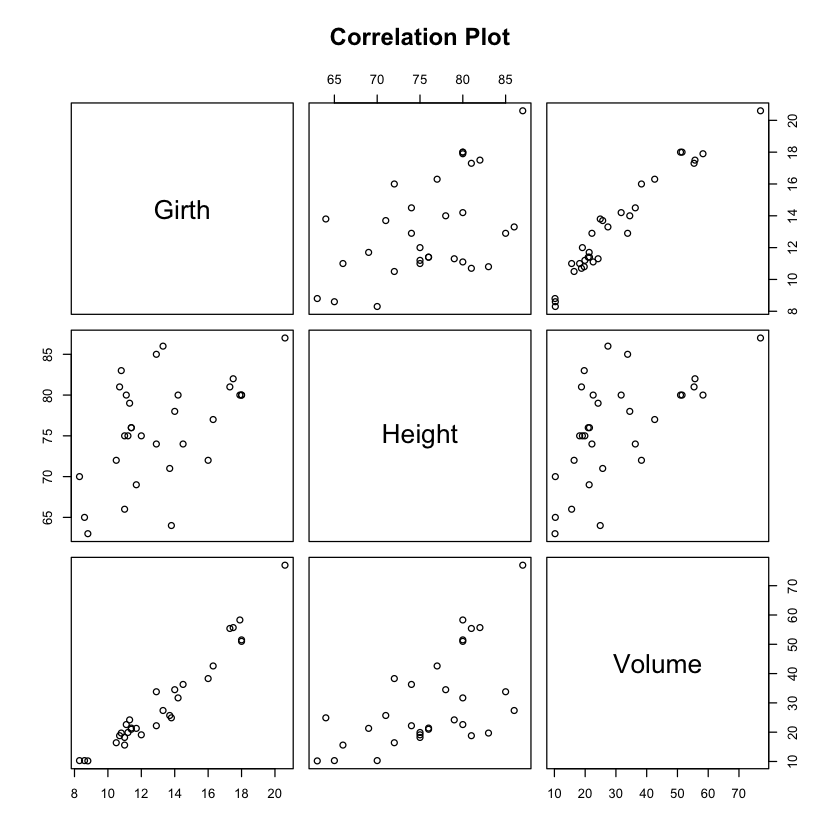

In [15]:
# data installed with R (package datasets)
# trees data:
# variables:  Girth   
#             Height  
#             Volume  
data(trees)
# names(trees)
# head(trees,3)
# trees$Height # just the height columnn
# sum(trees$Height)# sum height column
# sum(trees[,2])
attach(trees) #However, if we use attach() then we don’t even have to type out the data frame name to perform these calculations:
# sum(Height)
# Height[Height>75]
# min(Height)
# sd(Height)
# mean(Height)
# quantile(Height,probs=c(0.25,0.5,0.75))
# summary(Height)
# cor(Height,Volume)
# cor(Height,Volume,method="pearson") #spearman, pearson, kendall -> approx lin use pearson, otherwise use spearman
# cor.test(Height,Volume)   # testing the null hypothesis of no correlation
#plot(Height,Volume)
plot(trees, main="Correlation Plot") # scatter plot for all variables in dataframe
graphics.off()
detach(trees)

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 5):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 6):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 8):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 9):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 10):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 11)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


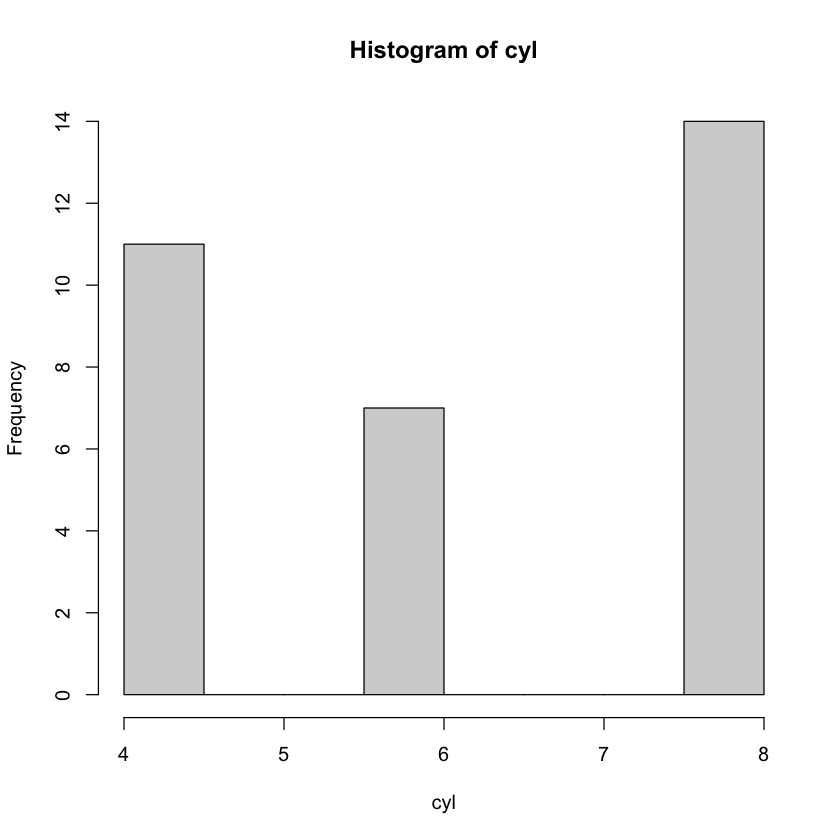

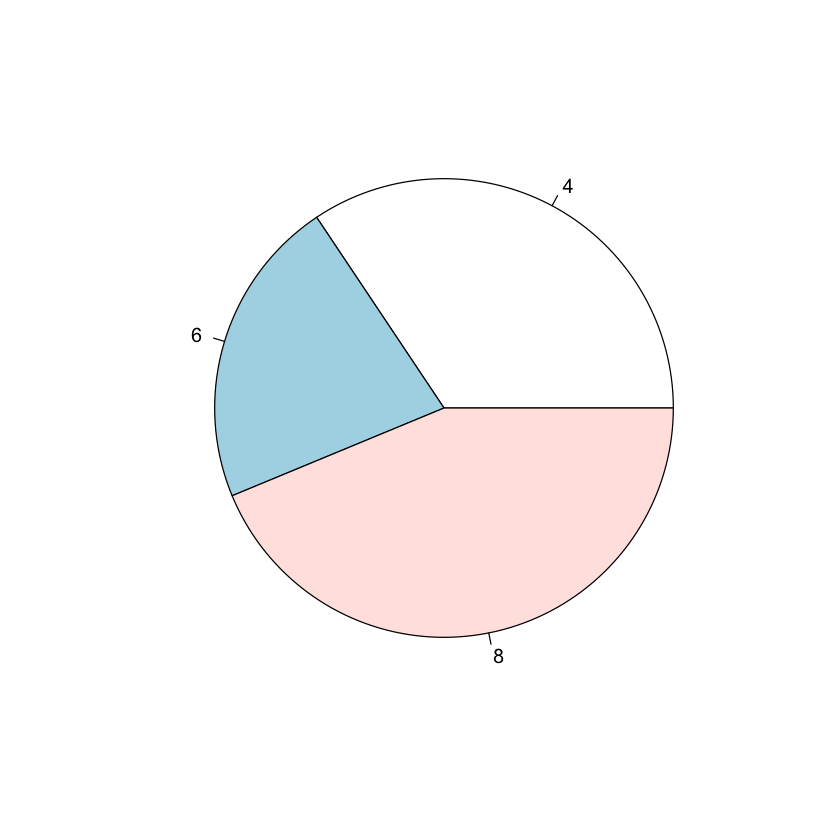

In [29]:
# mtcars data: The data was extracted from the 1974 Motor Trend US magazine, 
# and comprises fuel consumption and 10 aspects of automobile 
# design and performance for 32 automobiles (1973/74 models). 
data(mtcars)
#names(mtcars)
attach(mtcars)
mtcars
# mean(hp)
# min(hp)
# var(mpg)
# sd(mpg)
# quantile(qsec, probs=c(0.2,0.8))
# cor(wt,mpg)
# table(cyl)
# table(cyl)/length(cyl)
hist(cyl)
pie(table(cyl))
# summary(mtcars)
detach(mtcars)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51


The following objects are masked from faithful (pos = 3):

    eruptions, waiting


The following objects are masked from faithful (pos = 4):

    eruptions, waiting


The following objects are masked from faithful (pos = 5):

    eruptions, waiting


The following objects are masked from faithful (pos = 6):

    eruptions, waiting




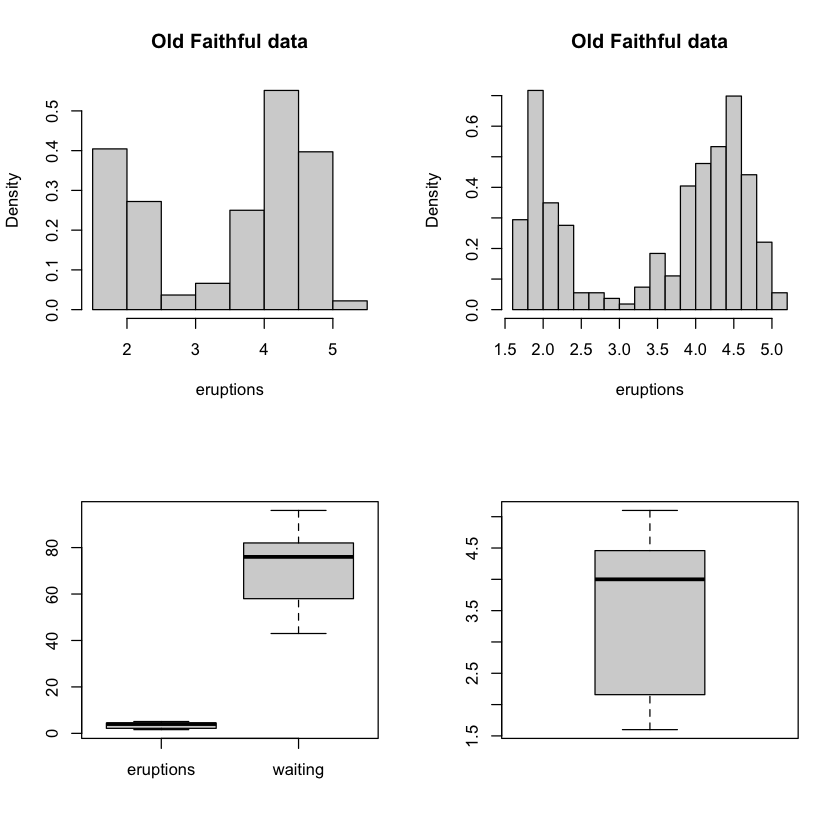

In [34]:
# faithful dataset
# variables: eruptions - duration of the eruptions
#            waiting   - time between eruptions
data(faithful)
faithful[1:10,]
# head(faithful)
# summary(faithful)
# colMeans(faithful)
# colSums(faithful)
attach(faithful)
# cor(eruptions, waiting)
# cor.test(eruptions, waiting)
#plot(eruptions, waiting)
#plot(density(waiting)) #plots a smooth histogram line
# cor(eruptions, waiting, method="spearman")
# cor.test(eruptions, waiting, method="spearman")
# cor.test(eruptions, waiting, method="spearman",exact=FALSE)
par(mfrow=c(2,2))   # par() graphical parameters use the par function to plot multuple plots, defining m x n array
#                     # mfrow=c(nr,nc) subsequente figures will be drawn in an (nr x nc) array
hist(eruptions, main = "Old Faithful data", prob=T)
hist(eruptions, main = "Old Faithful data", prob=T, breaks=18)
boxplot(faithful)
boxplot(eruptions)
detach(faithful)

## Distributions

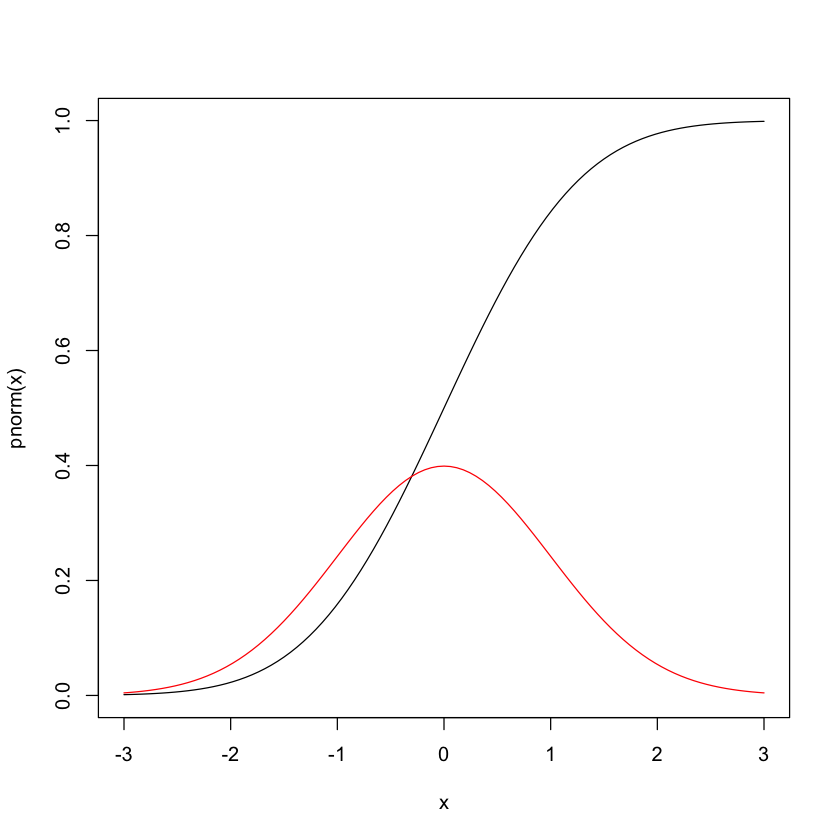

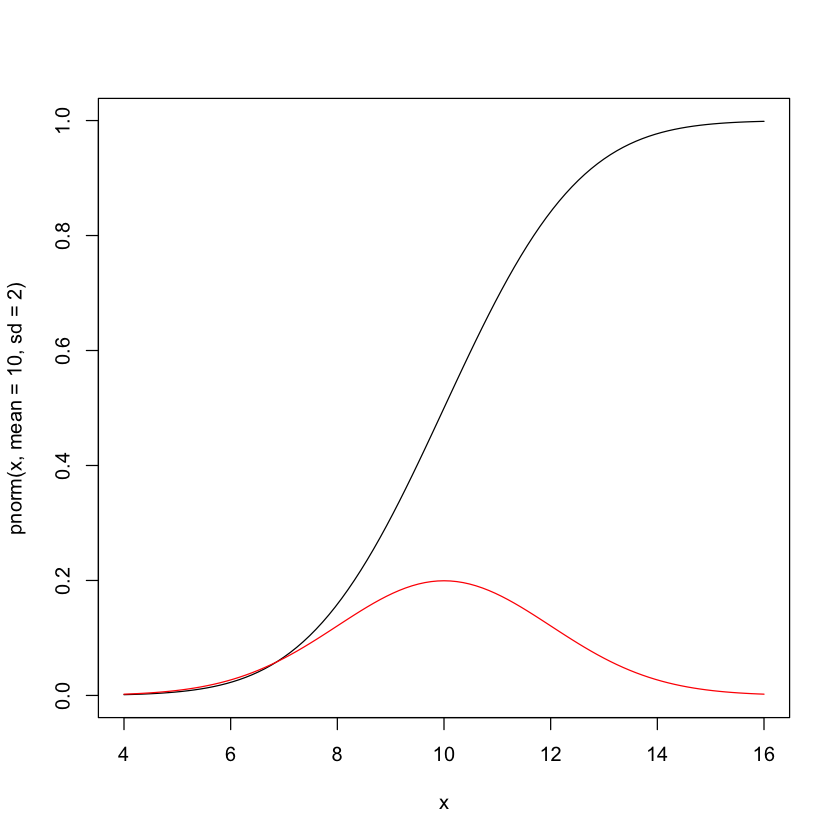

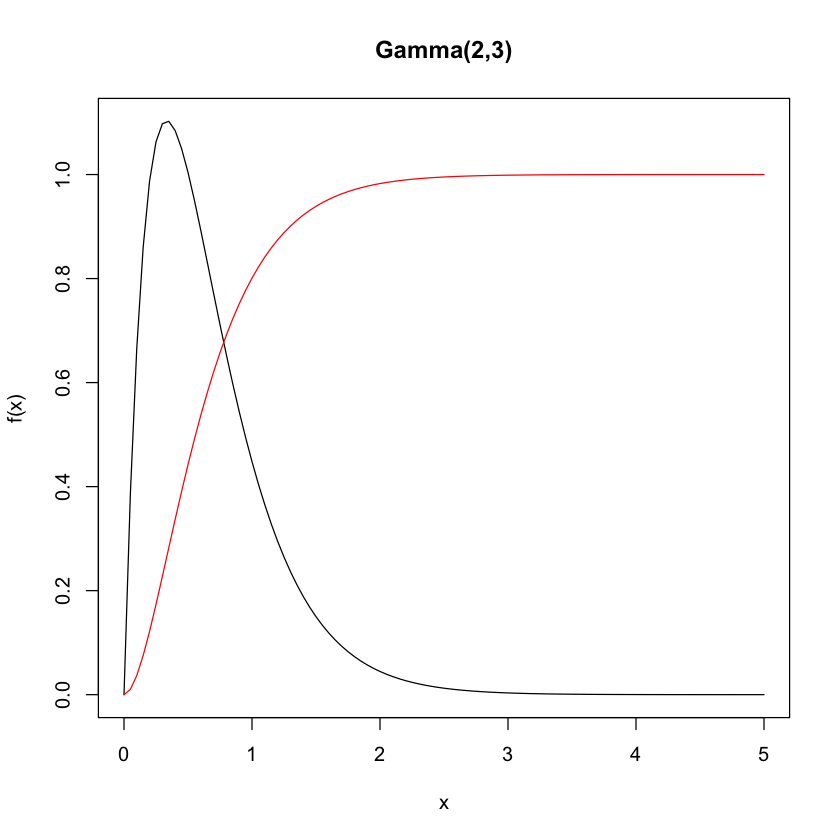

In [43]:
## distributions and plots
# Bin(10, 0.25)
x = 0:10
y = dbinom(x, size=10, prob=0.25)
#plot(x,y,type="h", ylab="Probability", xlab="Number of successes", main="Binomial with n=10, p=0.25", col="gray")
#type h is vertical lines, lwd is linewidth, col changes colour, main is titile, 
#barplot(y, ylab="Probability", xlab="Number of successes",col="cyan", 
 #                   main="Bin(n=10, p=0.25)") 
#N(0,1)
curve(pnorm(x), from = -3, to = 3)
curve(dnorm(x), from = -3, to = 3, col="red", add=TRUE)
# # N(10,2)
curve(pnorm(x, mean = 10, sd = 2), from = 4, to = 16)
curve(dnorm(x, mean = 10, sd = 2), from = 4, to = 16, col="red", add=TRUE)
# # Gamma(2,3)
curve(dgamma(x, shape = 2, rate = 3), from = 0, to = 5, ylab="f(x)", xlab="x", 
                                       main="Gamma(2,3)")
curve(pgamma(x, shape = 2, rate = 3), from = 0, to = 5, ylab="f(x)", xlab="x", 
                                      main="Gamma(2,3)", col="red", add=TRUE)

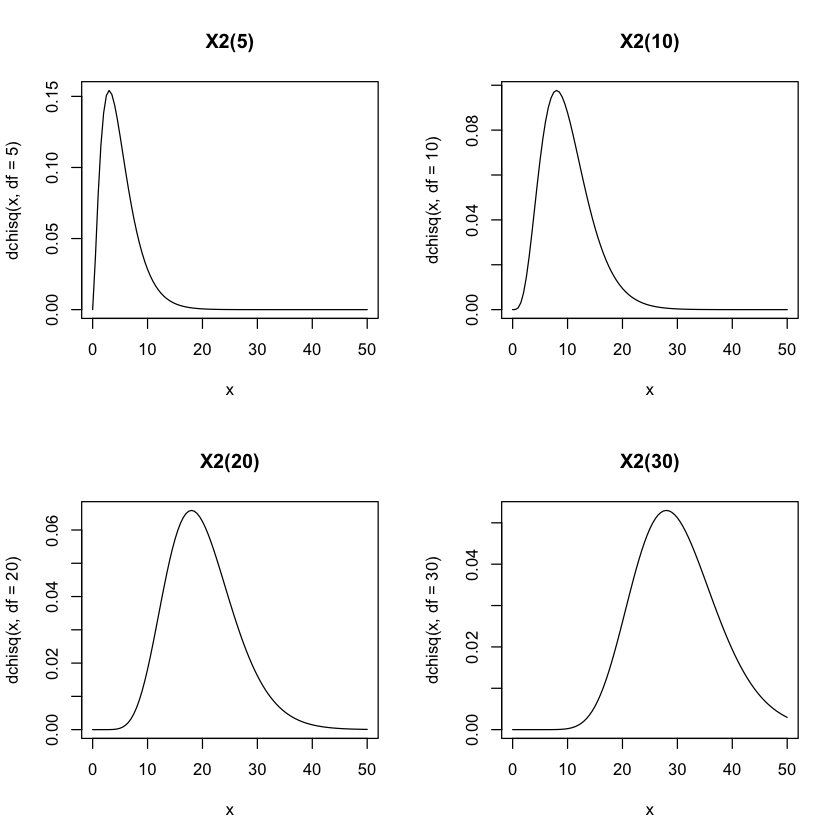

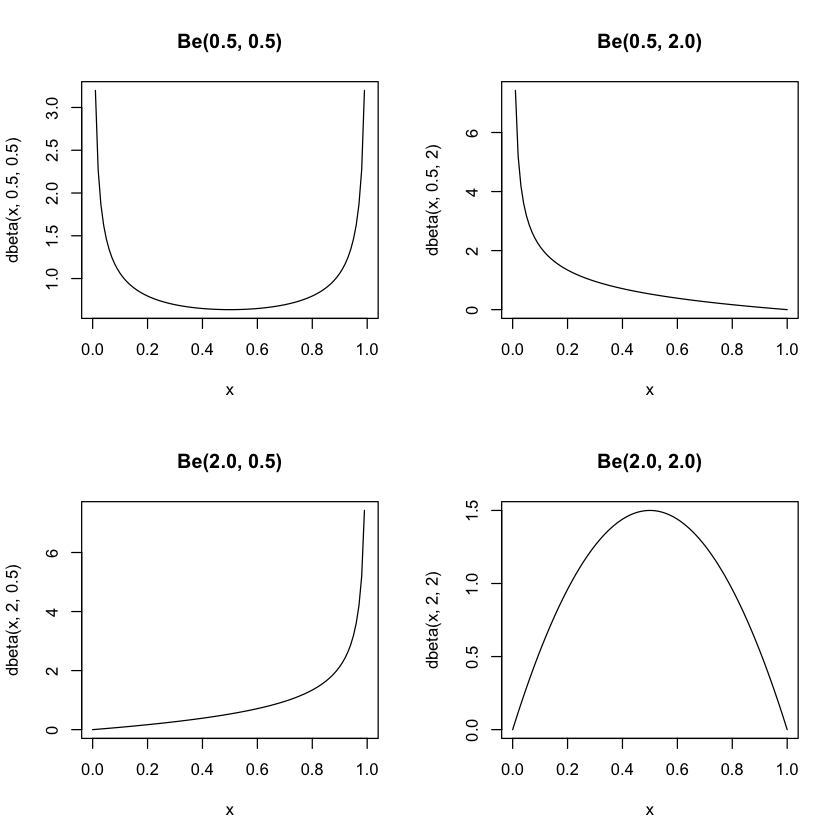

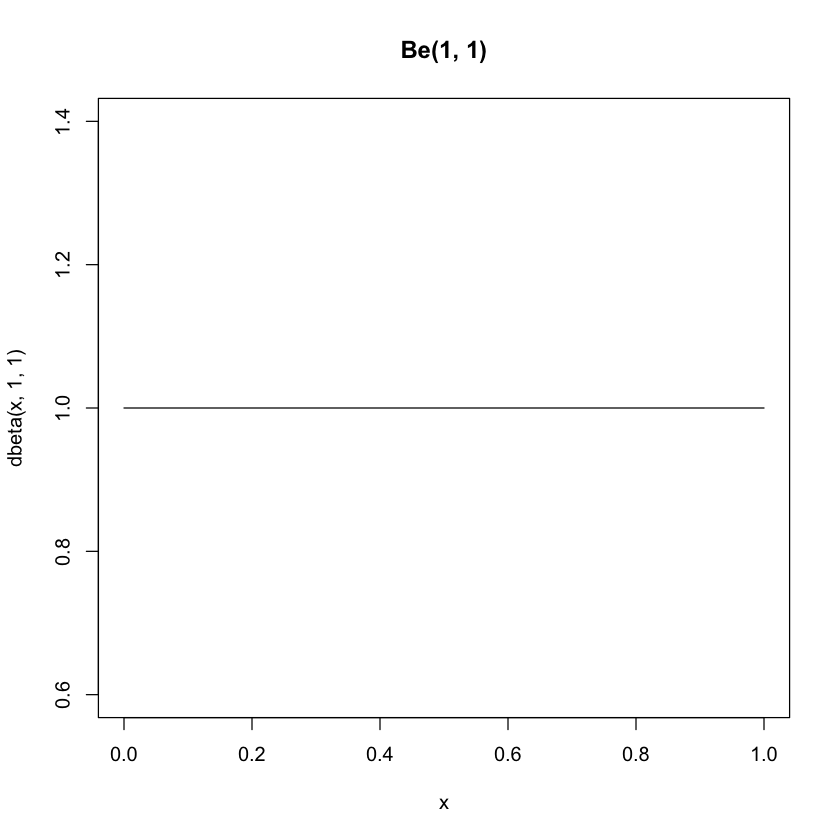

In [45]:
# Chi-squared
par(mfrow=c(2,2))
curve(dchisq(x,df=5), from=0,to=50, main="X2(5)")
curve(dchisq(x,df=10),from=0,to=50, main="X2(10)")    
curve(dchisq(x,df=20),from=0,to=50, main="X2(20)")  
curve(dchisq(x,df=30),from=0,to=50, main="X2(30)")  
par(mfrow=c(1,1))
# Beta(a,b)
par(mfrow=c(2,2))
curve(dbeta(x,0.5,0.5),from=0,to=1, main="Be(0.5, 0.5)")    #Be(0.5, 0.5)
curve(dbeta(x,0.5,2.0),from=0,to=1, main="Be(0.5, 2.0)")    #Be(0.5, 2.0)
curve(dbeta(x,2.0,0.5),from=0,to=1, main="Be(2.0, 0.5)")    #Be(2.0, 0.5)
curve(dbeta(x,2.0,2.0),from=0,to=1, main="Be(2.0, 2.0)")    #Be(2.0, 2.0)
par(mfrow=c(1,1))
curve(dbeta(x,1,1),from=0,to=1, main="Be(1, 1)")    #Be(1, 1) = Unif(0,1)

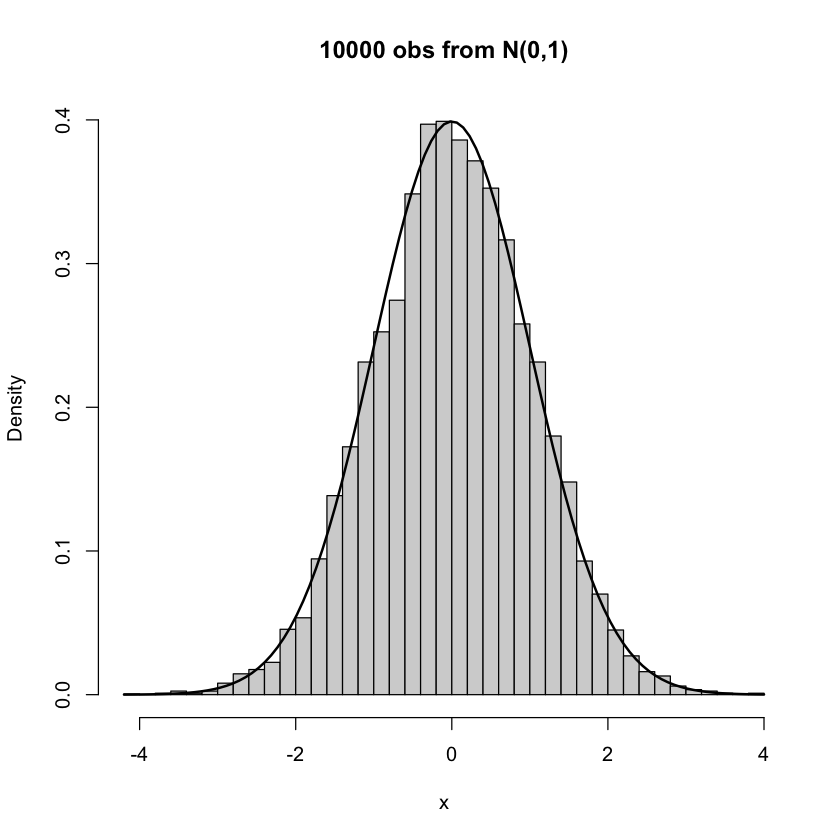

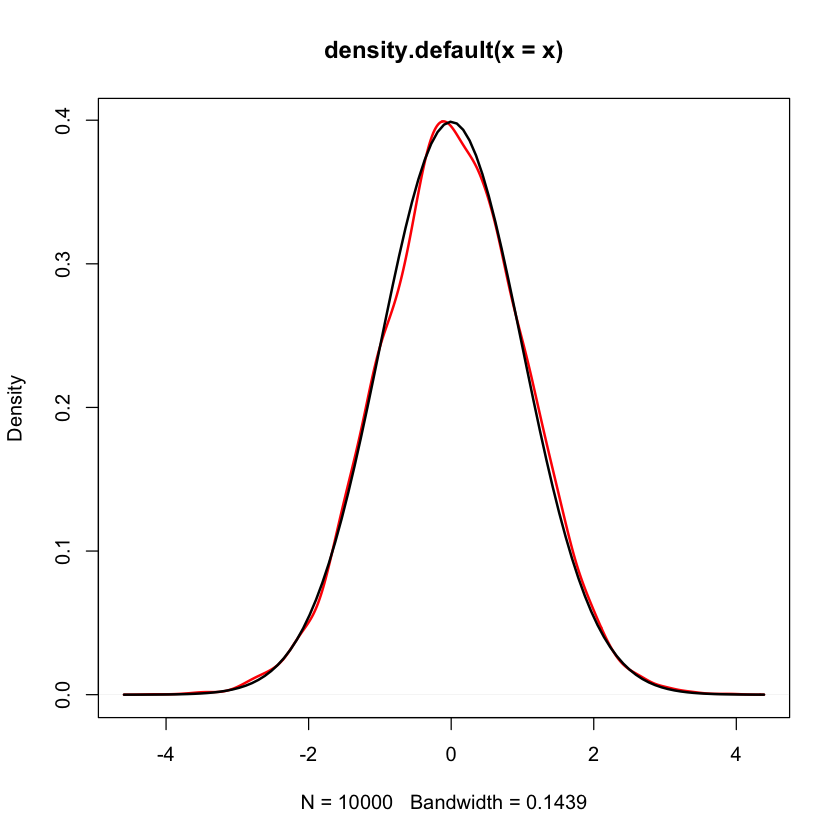

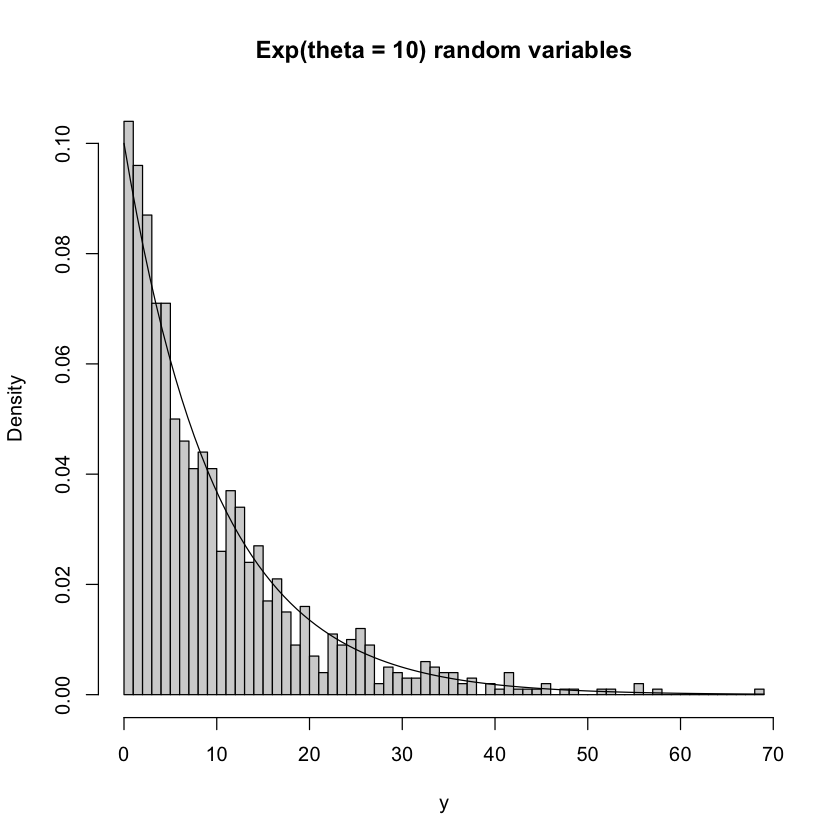

In [46]:
# simulate data from probability distributions
# N(0,1)
x <- rnorm(10000)
hist(x, prob=TRUE, breaks=50, main="10000 obs from N(0,1)")
curve(dnorm(x), lwd=2, add=TRUE)
plot(density(x), lwd=2, col="red")      # kernel density (smooth estimation)
curve(dnorm(x), lwd=2, add=TRUE)
# Exponential(0.1)
y <- rexp(1000, rate = 0.1)
hist(y, prob=T, breaks=50, main="Exp(theta = 10) random variables")
curve(dexp(x, rate=0.1), add=T)

In [47]:
## t-tests
## one sample
data(trees)
t.test(trees$Height, mu=70)

## t-tests
## Testing the effectiveness of a weight loss pill. 10 individuals take the pill and 10 a placebo
drug <- c(15,10,13,7,9,8,21,9,14,8)
plac <- c(15,14,12,8,14,7,16,10,15,12)
t.test(drug,plac, alternative="less", var.equal=T)
t.test(drug,plac, alternative = "two.sided", var.equal=T)


	One Sample t-test

data:  trees$Height
t = 5.2429, df = 30, p-value = 1.173e-05
alternative hypothesis: true mean is not equal to 70
95 percent confidence interval:
 73.6628 78.3372
sample estimates:
mean of x 
       76 



	Two Sample t-test

data:  drug and plac
t = -0.53311, df = 18, p-value = 0.3002
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 2.027436
sample estimates:
mean of x mean of y 
     11.4      12.3 



	Two Sample t-test

data:  drug and plac
t = -0.53311, df = 18, p-value = 0.6005
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.446765  2.646765
sample estimates:
mean of x mean of y 
     11.4      12.3 


$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"


Call:
lm(formula = Volume ~ Height, data = trees)

Coefficients:
(Intercept)       Height  
    -87.124        1.543  



Call:
lm(formula = Volume ~ Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.274  -9.894  -2.894  12.068  29.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.1236    29.2731  -2.976 0.005835 ** 
Height        1.5433     0.3839   4.021 0.000378 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 29 degrees of freedom
Multiple R-squared:  0.3579,	Adjusted R-squared:  0.3358 
F-statistic: 16.16 on 1 and 29 DF,  p-value: 0.0003784


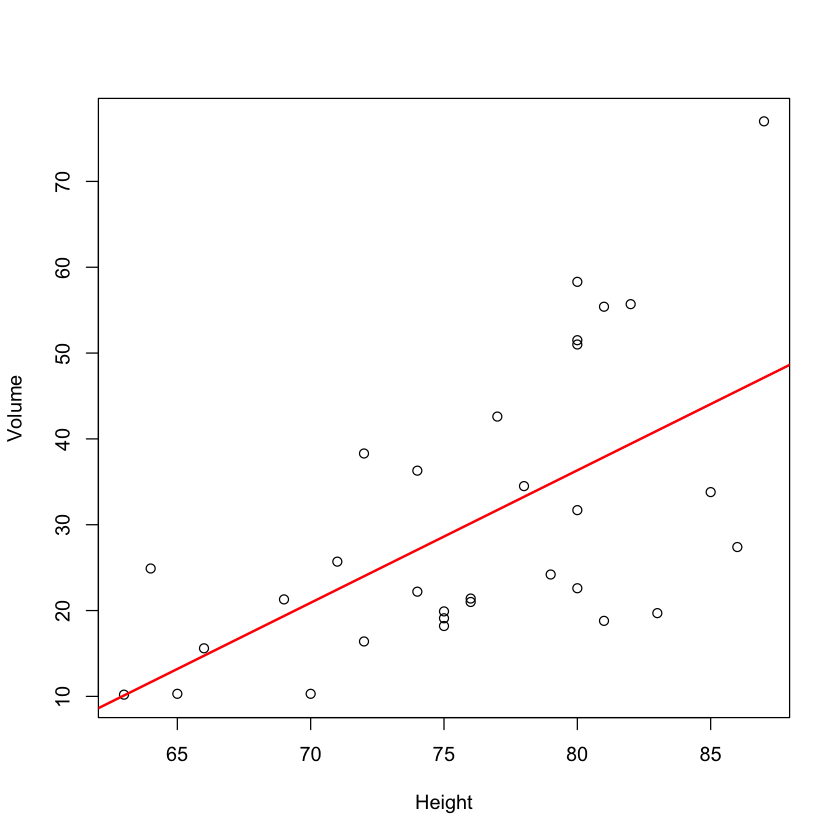

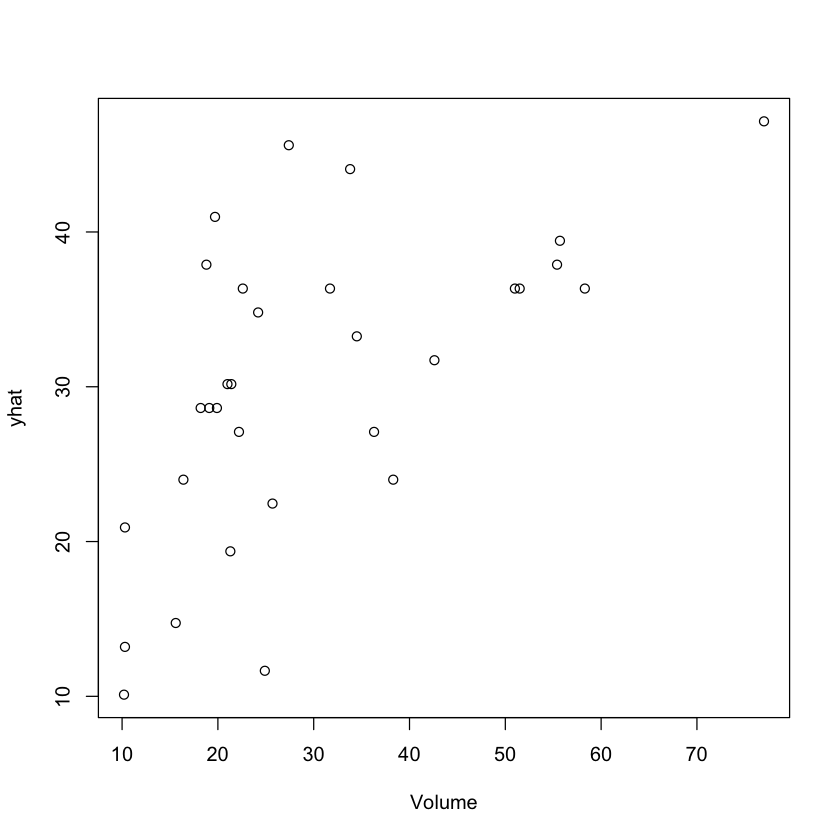

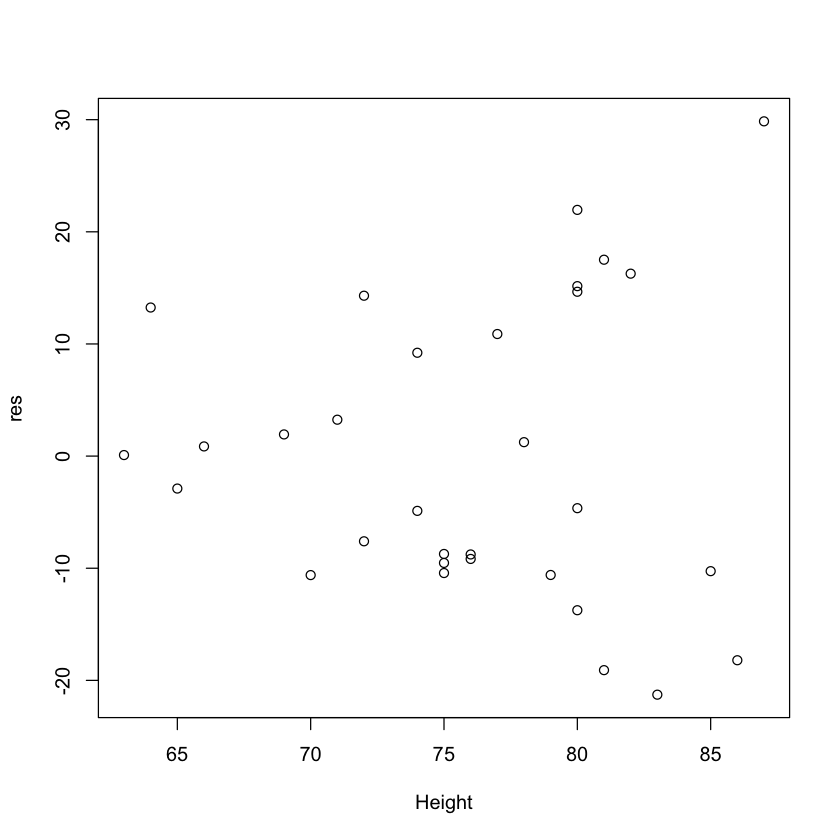

In [48]:
## linear regression
data(trees)
fit <- lm(Volume ~ Height, data=trees) # volume is y
attributes(fit) 
fit
summary(fit)
plot(Height,Volume)   # scatter plot of Height vs Volume
abline(fit, lwd=2, col="red")
res <- residuals(fit)
yhat <- fitted(fit)
plot(Volume,yhat)  # or plot(yhat~Volume)
plot(Height,res)   # or plot(res~Height)

In [ ]:
# random generators: simulating real experiences
# tossing a dice 10x
sample(1:6,10, replace=T)
# tossing a coin 10x
sample(c("H","T"),10,replace=T)
# choose 6 in 54 
sample(1:54,6)
sample(1:54,6,replace=T)
## calculating probabilities
# Normal
pnorm(1.645)
pnorm(1.645,lower.tail=F)
qnorm(0.95)
qnorm(0.05)
# Chi-square
df <- 10
pchisq(18.3, df, lower.tail = FALSE)
qchisq(0.05, df, lower.tail = FALSE)
# Binomial(10,0.5)
barplot(dbinom(1:10,10,0.5))
barplot(pbinom(1:10,10,0.5))
pbinom(5,10,0.5,lower.tail=TRUE)
qbinom(0.05,10,0.5,lower.tail=TRUE)



In [1]:

# functions in R
f <- function(x,y) {x+y}
f(1,2)

f1 <- function(a,b) {
  # this function returns the maximum of two values
  if(is.numeric(c(a,b))) {
     if(a<b) return(b)
     if(a>b) return(a)
     else print("The values are equal")
  }
  else print("Character inputs are not allowed")
}
f1(4,7)
f1(10,2)
f1(2,2)
f1("John","Mike")

# ## likelihood estimation with optimize()
# # weibull pdf
# data <- rweibull(1000,shape=4,scale=1)
# data[1:10]
# hist(data,prob=T)
# curve(dweibull(x,4,1),from=0,to=4,add=T)
# llik <- function(theta,x) {
#    return(length(x)*log(theta)+(theta-1)*sum(log(x))-sum(x^theta))
# }
# optimize(llik, interval=c(0,20), x=data, maximum=T)


# # Fibonacci numbers: F[1] = F[2], F[i] = F[i-2] + F[i-1], i=3,4,...
# # 0, 1, 1, 2, 3, 5, 8, ...
# Fibonacci <- function(n) {
#   x <- c(0,1)
#   while (length(x) < n) {
#     position <- length(x)
#     new <- x[position] + x[position-1]
#     x <- c(x,new)
#   }
#   return(x)
# }
# Fibonacci(10)
# Fibonacci(3)
# Fibonacci(1)  # does not work


# # or
# Fibonacci <- function(n) {
#   if (n==1) {
#     x <- 0
#   } else {
#     x <- c(0,1)
#     while (length(x) < n) {
#       position <- length(x)
#       new <- x[position] + x[position-1]
#       x <- c(x,new)
#     }
#   }
#   return(x)
# }
# Fibonacci(10)
# Fibonacci(3)
# Fibonacci(1)


[1] 3

[1] 7

[1] 10

[1] "The values are equal"
[1] "Character inputs are not allowed"
